In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import

In [40]:
df=pd.read_csv("C:\\Users\\bikki\\Downloads\\diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### 3.1 Data Cleaning

In [4]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
print({len(cat_cols)})
print(cat_cols)

{3}
['cut', 'color', 'clarity']


### 3.2 Outlier Treatment

#### Outlier Detection

In [6]:
num_cols = ['carat','depth','table','price','x', 'y', 'z']

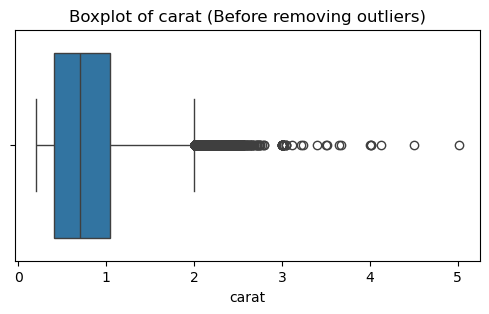

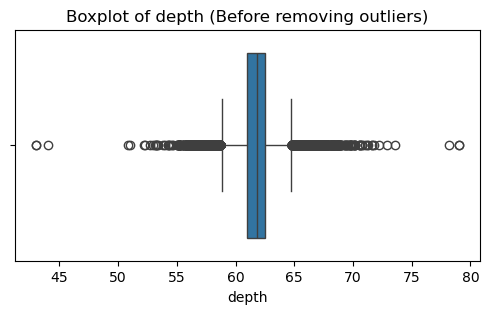

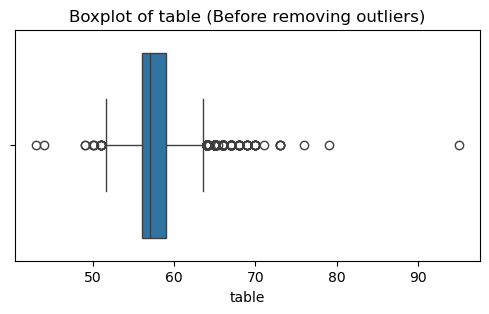

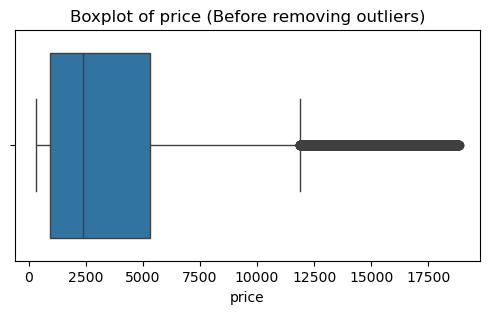

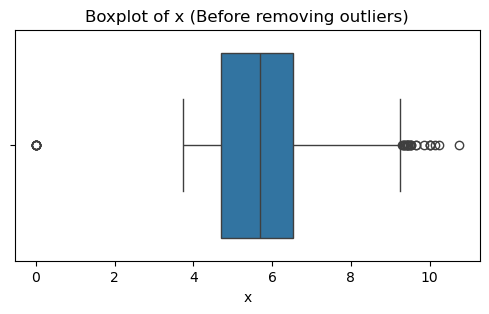

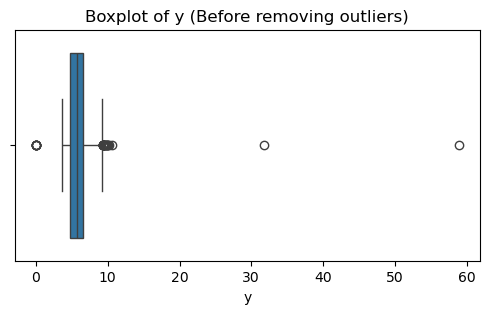

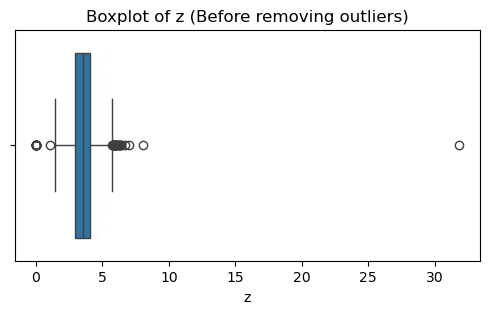

In [7]:
# Boxplot for each numeric column
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df,x=col)
    plt.title(f'Boxplot of {col} (Before removing outliers)')
    plt.show()



###	Outlier Handling

In [8]:
# --- 2. Outlier Handling using IQR method ---
# Function to remove outliers based on IQR
def remove_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[(df[column] >= lower_bound) & (df[column] <=upper_bound)]

# Remove Outliers From each Numerical columns
df_no_outliers=df.copy()
for col in num_cols:
    df_no_outliers=remove_outliers_iqr(df_no_outliers,col)
print("\nOriginal shape:", df.shape)
print("Shape after outlier removal:", df_no_outliers.shape)


Original shape: (53940, 11)
Shape after outlier removal: (46532, 11)


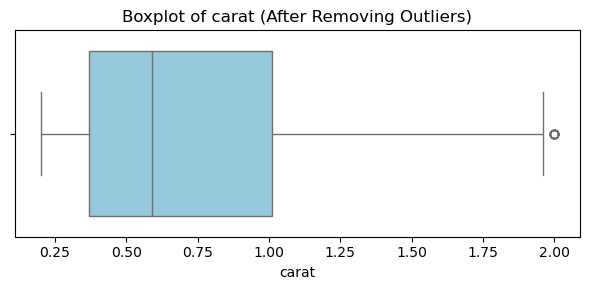

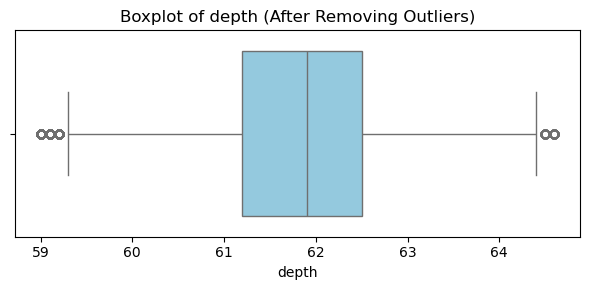

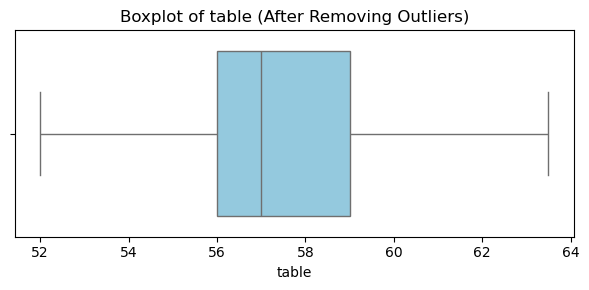

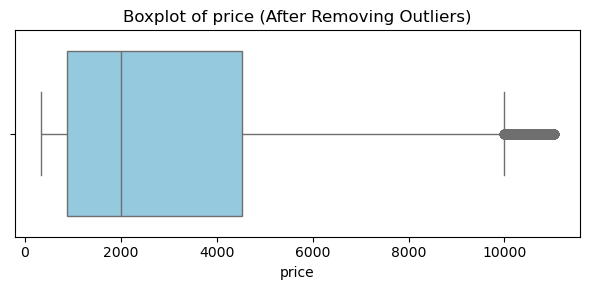

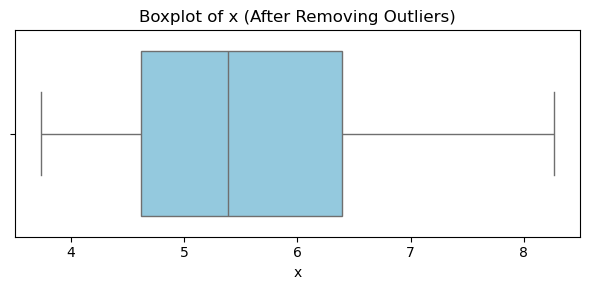

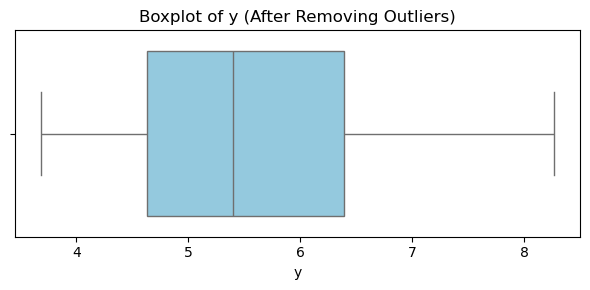

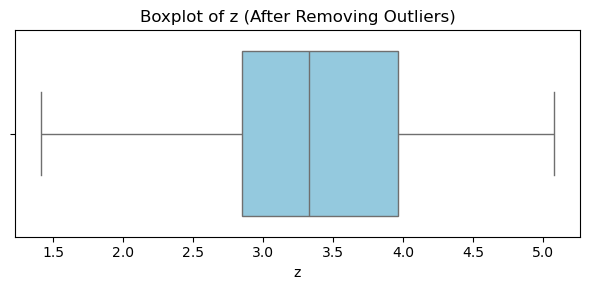

In [9]:
# Create box plots after outlier removal
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df_no_outliers,x=col,color='skyblue')
    plt.title(f'Boxplot of {col} (After Removing Outliers)')
    plt.tight_layout()
    plt.show()


## 4. Exploratory Data Analysis (EDA)

### 4.1 Summary Statistics

In [10]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### 4.2 Univariate Analysis

#### Distribution of categorical variables

C:\Users\bikki\AppData\Local\Temp\ipykernel_21168\386750041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_outliers,x=col,palette='pastel',order=df_no_outliers[col].value_counts().index)


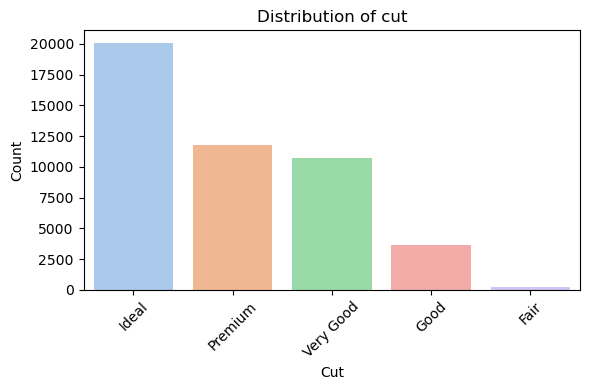

C:\Users\bikki\AppData\Local\Temp\ipykernel_21168\386750041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_outliers,x=col,palette='pastel',order=df_no_outliers[col].value_counts().index)


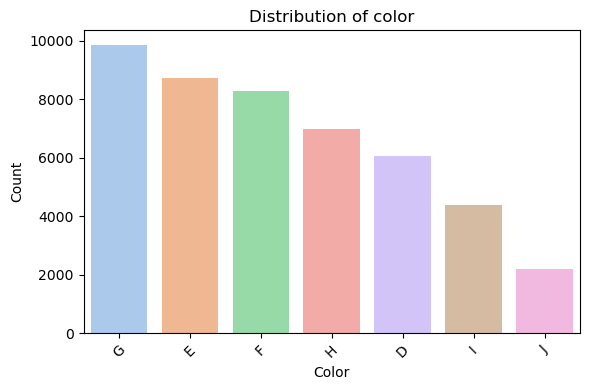

C:\Users\bikki\AppData\Local\Temp\ipykernel_21168\386750041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_outliers,x=col,palette='pastel',order=df_no_outliers[col].value_counts().index)


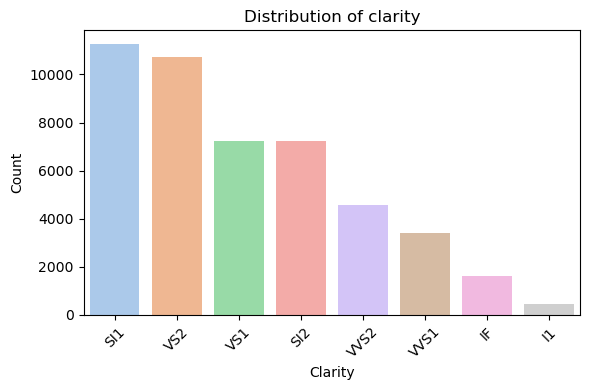

In [11]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_no_outliers,x=col,palette='pastel',order=df_no_outliers[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 4.3	Bivariate Analysis

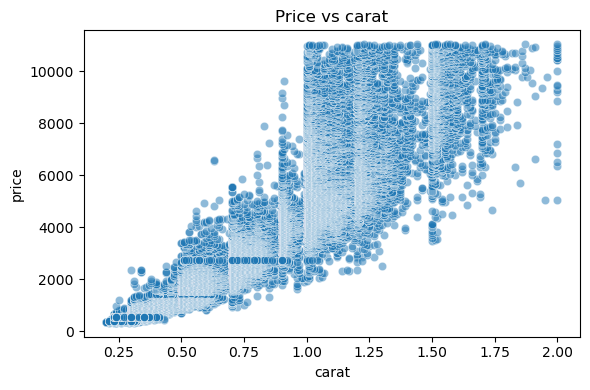

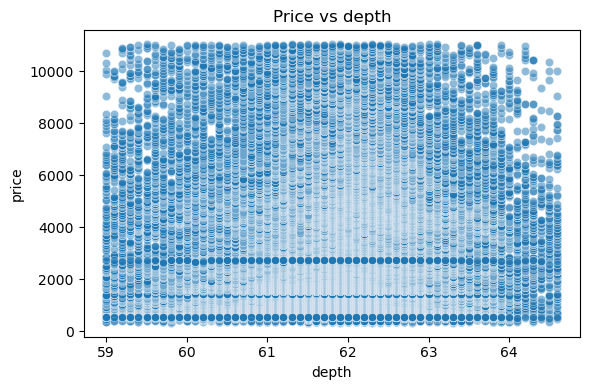

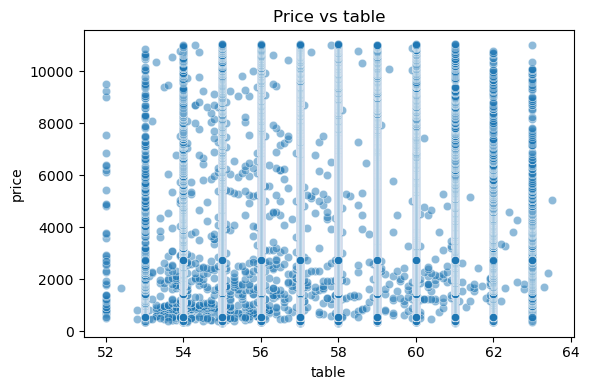

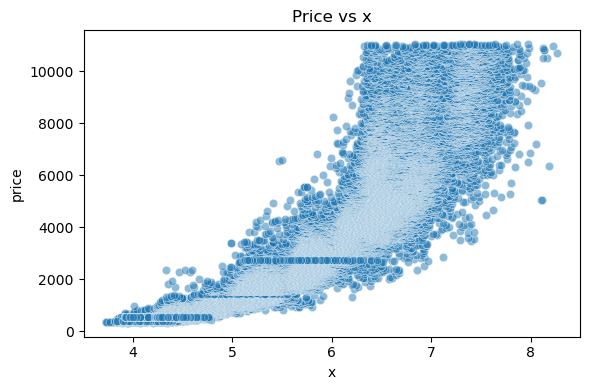

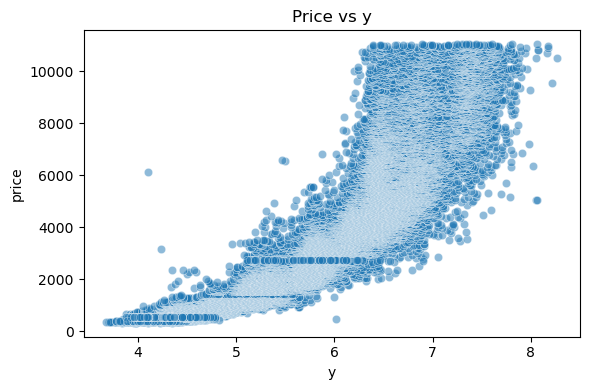

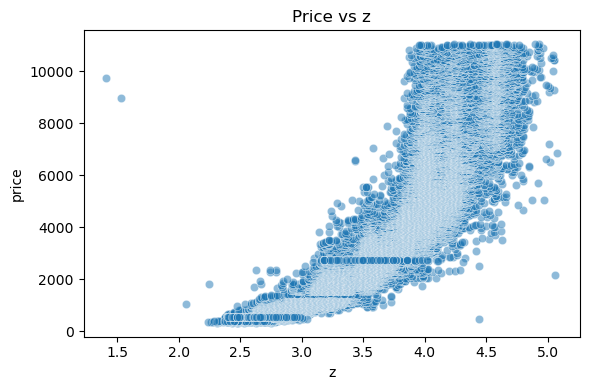

In [12]:
# Scatter plots between price and other numerical variables
for col in ['carat','depth','table','x','y','z']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_no_outliers,x=col,y='price',alpha=0.5)
    plt.title(f'Price vs {col}')
    plt.tight_layout()
    plt.show()

C:\Users\bikki\AppData\Local\Temp\ipykernel_21168\674502706.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_outliers,x=col,y='price',palette='pastel')
C:\Users\bikki\AppData\Local\Temp\ipykernel_21168\674502706.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_no_outliers,x=col, y='price', palette='Set3')


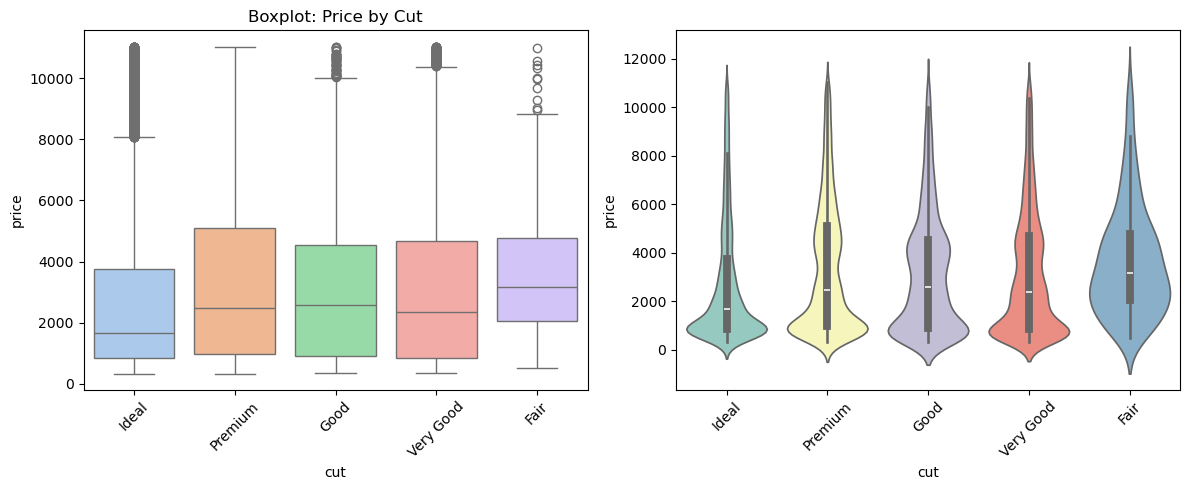

C:\Users\bikki\AppData\Local\Temp\ipykernel_21168\674502706.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_outliers,x=col,y='price',palette='pastel')
C:\Users\bikki\AppData\Local\Temp\ipykernel_21168\674502706.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_no_outliers,x=col, y='price', palette='Set3')


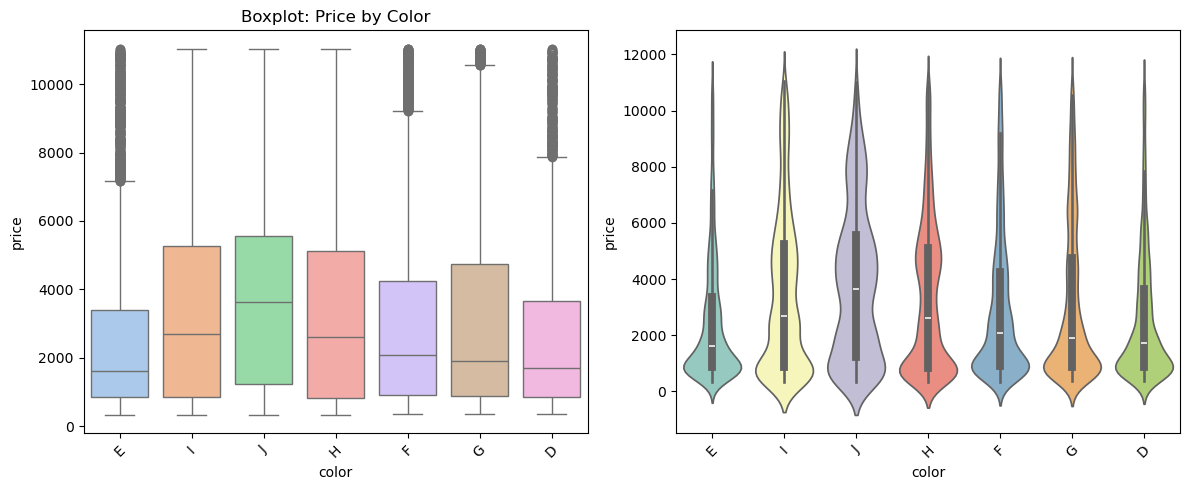

C:\Users\bikki\AppData\Local\Temp\ipykernel_21168\674502706.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_outliers,x=col,y='price',palette='pastel')
C:\Users\bikki\AppData\Local\Temp\ipykernel_21168\674502706.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_no_outliers,x=col, y='price', palette='Set3')


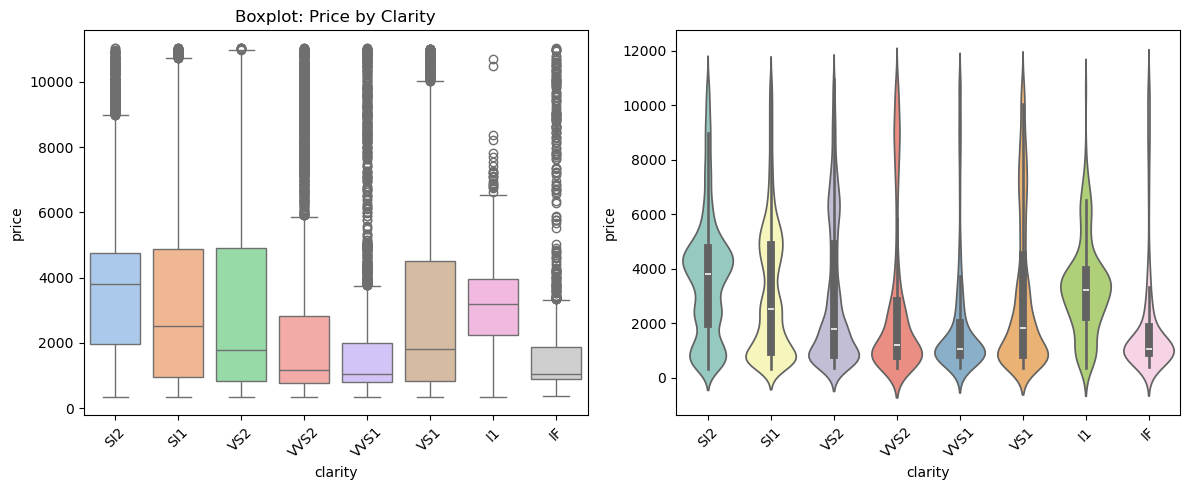

In [13]:
# Box and violin plots for price by each categorical column
for col in cat_cols:
    plt.figure(figsize=(12,5))

    # Box Plot
    plt.subplot(1,2,1)
    sns.boxplot(data=df_no_outliers,x=col,y='price',palette='pastel')
    plt.title(f'Boxplot: Price by {col.capitalize()}')
    plt.xticks(rotation=45)

    # Violin Plot
    plt.subplot(1,2,2)
    sns.violinplot(data=df_no_outliers,x=col, y='price', palette='Set3')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 5. Model Building

### Random Forest Regression

#### 1.	Encoding Categorical Variables:

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df_encoded=df_no_outliers.copy()
for col in ['cut','color','clarity']:
    df_encoded[col]=le.fit_transform(df_encoded[col])

In [24]:
df_encoded.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


####   Feature & target separation


In [28]:
x=df_encoded.drop(columns='price',axis=1)

In [29]:
y=df_encoded['price']

 
#### 2. Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [63]:
# 3. Data Scaling
x_scaled = scaler.fit_transform(x)
x_scaled[:10]

array([[-1.69596455, -1.29265013, -0.66158224, -0.91095996, -0.51259634,
        -0.28245995, -1.11162934, -1.62923254, -1.61309257, -1.64742238],
       [-1.69590237, -1.34789556,  0.39904635, -0.91095996, -1.09078781,
        -1.86043599,  1.8677838 , -1.69144314, -1.7591332 , -1.84835721],
       [-1.69577801, -1.12691384,  0.39904635,  1.4625986 ,  0.6437866 ,
         0.55293912,  0.37807723, -1.37002173, -1.35230571, -1.31253101],
       [-1.69571583, -1.07166841, -1.72221082,  2.05598823, -0.51259634,
         1.3883382 ,  0.37807723, -1.22486368, -1.22712802, -1.11159618],
       [-1.69565365, -1.26502742,  1.45967493,  2.05598823,  1.80016954,
         0.9242276 , -0.11849163, -1.63960098, -1.63395551, -1.56369954],
       [-1.69559147, -1.26502742,  1.45967493,  1.4625986 ,  1.22197807,
         0.460117  , -0.11849163, -1.62923254, -1.61309257, -1.58044411],
       [-1.6955293 , -1.20978198,  1.45967493,  0.86920896, -1.09078781,
         0.08882853, -1.11162934, -1.50481135

####  3.	Data Split:

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=42)

In [37]:
len(x_train)

37225

In [41]:
len(y_test)

9307

#### 4.	Model Training:

In [45]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [54]:
#### 5.	Prediction:

In [57]:
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)
y_test_pred[:10]

array([3432.31,  738.  , 3415.12, 1076.85, 1990.93, 2708.19,  786.83,
       4672.08, 3167.14, 7814.6 ])

In [49]:
y_test[:10]

3627     3431
30713     738
3555     3416
39451    1077
48559    1991
53666    2708
32186     788
9834     4672
2320     3167
18985    7814
Name: price, dtype: int64

#### 6.	Model Evaluation:

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [68]:
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)

print(f"Model Performance:")
print(f'R2_Score: ' ,r2)
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Model Performance:
R2_Score:  0.9997565585505813
R-squared: 0.9998
RMSE: 40.49
MAE: 3.74


## Model Perfomance Analysis

- R² Score: 0.9998

- r2_score: 0.9997565585505813

- R-squared:- This means that 99.98% of the variance in diamond prices is explained by the model.
  This is nearly a perfect fit,indicating that the model has captured almost all underlying patterns in the data.

- Root Mean Squared Error (RMSE): 40.49

- On average, the model’s predictions deviate from the actual price by about $40.49.
  Given the range and scale of diamond prices, this is very low and confirms high accuracy.

- Mean Absolute Error (MAE): 3.74